In [ ]:
# 1: Importing Required Libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx
import pylab as pl

In [ ]:
# 2: Create the maze

maze = [
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
]

ROWS = len(maze)
COLS = len(maze[0])

In [ ]:
# 3: Convert 2D position to state number

def pos_to_state(row, col):
    return row * COLS + col

In [ ]:
# 4: Convert state number to 2D position

def state_to_pos(state):
    return divmod(state, COLS)

In [ ]:
# 5: Get valid neighbors

def get_neighbors(r, c):
    moves = [(-1,0), (1,0), (0,-1), (0,1)]
    neighbors = []
    for dr, dc in moves:
        nr, nc = r + dr, c + dc
        if 0 <= nr < ROWS and 0 <= nc < COLS and maze[nr][nc] == 1:
            neighbors.append((nr, nc))
    return neighbors

In [ ]:
# 6: Create reward matrix

N = ROWS * COLS
R = np.full((N, N), -1)

goal = (6, 11)
goal_state = pos_to_state(*goal)

for r in range(ROWS):
    for c in range(COLS):
        if maze[r][c] == 1:
            s = pos_to_state(r, c)
            for nr, nc in get_neighbors(r, c):
                ns = pos_to_state(nr, nc)
                if (nr, nc) == goal:
                    R[s, ns] = 100
                else:
                    R[s, ns] = 0

In [ ]:
# 7: Q Matrix

Q = np.zeros((N, N))

In [ ]:
# 8: Q-Learning

gamma = 0.8
epochs = 1000
scores = []

for _ in range(epochs):
    current_pos = (random.randint(0, ROWS-1), random.randint(0, COLS-1))
    while maze[current_pos[0]][current_pos[1]] != 1:
        current_pos = (random.randint(0, ROWS-1), random.randint(0, COLS-1))

    state = pos_to_state(*current_pos)

    valid_actions = np.where(R[state] >= 0)[0]
    action = np.random.choice(valid_actions)

    next_state = action
    max_q = np.max(Q[next_state])
    Q[state, next_state] = R[state, next_state] + gamma * max_q

    scores.append(np.sum(Q / (np.max(Q) if np.max(Q) > 0 else 1) * 100))


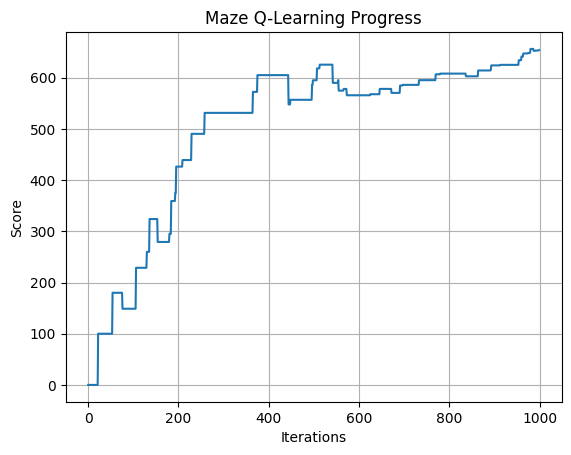

In [ ]:
# 9: Plot the Learning Progress

plt.plot(scores)
plt.title("Maze Q-Learning Progress")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:
# 10: Extract the Optimal Path

def get_optimal_path(start):
    path = []
    current_state = pos_to_state(*start)
    path.append(start)

    while current_state != goal_state:
        next_states = np.where(Q[current_state] == np.max(Q[current_state]))[0]
        if len(next_states) > 1:
            next_state = np.random.choice(next_states)
        else:
            next_state = next_states[0]

        next_pos = state_to_pos(next_state)
        path.append(next_pos)
        current_state = next_state

        if len(path) > 100:
            break  # Prevent infinite loop

    return path

In [ ]:
# 11: Test the Agent

start = (0, 1)
optimal_path = get_optimal_path(start)
print("Optimal path from start to goal:")
print(optimal_path)

Optimal path from start to goal:
[(0, 1), (np.int64(0), np.int64(2)), (np.int64(1), np.int64(7)), (np.int64(4), np.int64(0)), (np.int64(6), np.int64(10)), (np.int64(3), np.int64(1)), (np.int64(2), np.int64(1)), (np.int64(1), np.int64(7)), (np.int64(3), np.int64(2)), (np.int64(5), np.int64(6)), (np.int64(5), np.int64(7)), (np.int64(5), np.int64(8)), (np.int64(5), np.int64(9)), (np.int64(5), np.int64(10)), (np.int64(5), np.int64(11)), (np.int64(6), np.int64(11))]
